## N-Asset Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

## Solution

```python 

    def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
  
    weights = minimize_vol(target_return)???
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    
    ef = pd.DataFrame(
        {
            "Returns": rets, 
            "Volatility": vols
        }
    )
    return ef.plot.line(x="Volatility", y="Returns", style=style) 
```

In [2]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

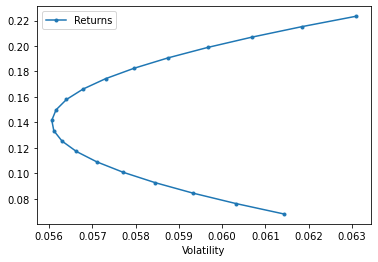

In [3]:
l = ["games", "fin"]
erk.plot_ef2(20, er[l], cov.loc[l, l])

In [4]:
import numpy as np

def target_is_met(w, er, target_return):
    return target_return - erk.portfolio_return(w, er, )

def minimize_vol(target_return, er, cov):
    """
    target_return -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    
    bounds = ((0.0, 1.0),) * n
    
    return_is_target = {
        "type": "eq",
        "args": (er,),
        "fun": lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_one = {
        "type": "eq",
        "fun": lambda weights: np.sum(weights) - 1
    }
    
    results = minimize(
        erk.portfolio_vol, 
        init_guess, 
        args = (cov,),
        method = "SLSQP",
        options = {"disp": False},
        constraints = (return_is_target, weights_sum_to_one), 
        bounds = bounds
    )
    
    return results.x

In [5]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l, l])
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

0.056163669406706564

In [6]:
w15

array([0.47287631, 0.52712369])

In [7]:
def optimal_weights(n_points, er, cov):
    """
    -> List of weights to run the optimizer on
    to minimize the vol.
    """
    target_rs = np.linspace(er.mean(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights


def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
  
    weights = optimal_weights(n_points, er, c ov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    
    ef = pd.DataFrame(
        {
            "Returns": rets, 
            "Volatility": vols
        }
    )
    return ef.plot.line(x="Volatility", y="Returns", style=style) 

<AxesSubplot:xlabel='Volatility'>

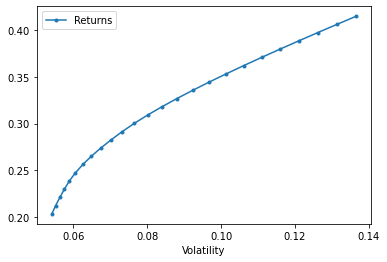

In [8]:
import pandas as pd
l = ["smoke", "fin", "games", "coal"]
erk.plot_ef(25, er[l], cov.loc[l, l])